In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'JUNE 2022 BELGAUM.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2022,1,26.37,22.45,32.03,16.17,0.27,93.35,2.21
1,2022,2,25.83,22.51,30.63,17.09,14.62,93.38,2.51
2,2022,3,26.17,22.65,32.43,16.72,5.20,93.38,2.98
3,2022,4,26.92,22.49,34.37,15.56,0.01,93.35,2.37
4,2022,5,25.83,23.33,30.03,17.21,0.77,93.36,2.41


In [ ]:
data.shape


(30, 9)

In [ ]:
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
0,2022,1,26.37,22.45,32.03,16.17,0.27,2.21
1,2022,2,25.83,22.51,30.63,17.09,14.62,2.51
2,2022,3,26.17,22.65,32.43,16.72,5.20,2.98
3,2022,4,26.92,22.49,34.37,15.56,0.01,2.37
4,2022,5,25.83,23.33,30.03,17.21,0.77,2.41


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2022.0,15.500000,24.565333,21.956000,28.787000,16.935000,10.234667,3.179000
std,0.0,8.803408,0.912294,0.702722,1.959189,0.764992,8.875146,0.774278
min,2022.0,1.000000,23.300000,20.510000,26.000000,15.500000,0.010000,2.110000
25%,2022.0,8.250000,23.867500,21.472500,27.555000,16.420000,2.280000,2.530000
50%,2022.0,15.500000,24.420000,22.050000,28.545000,16.910000,9.095000,2.965000
75%,2022.0,22.750000,24.820000,22.505000,29.672500,17.550000,16.555000,3.672500
max,2022.0,30.000000,26.920000,23.330000,34.370000,18.190000,28.910000,4.910000


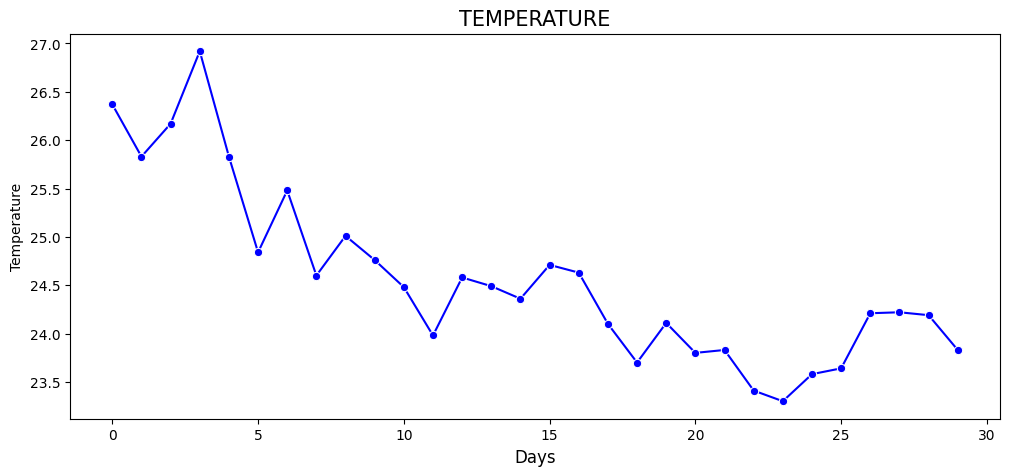

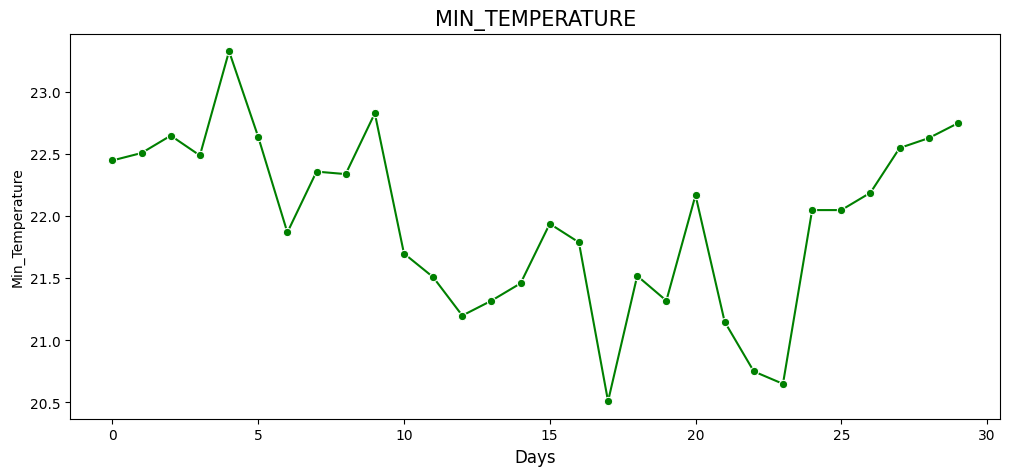

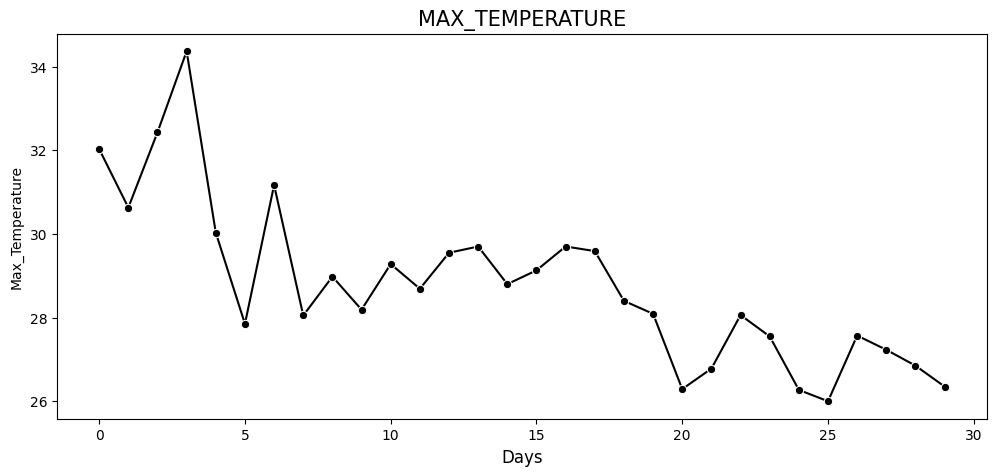

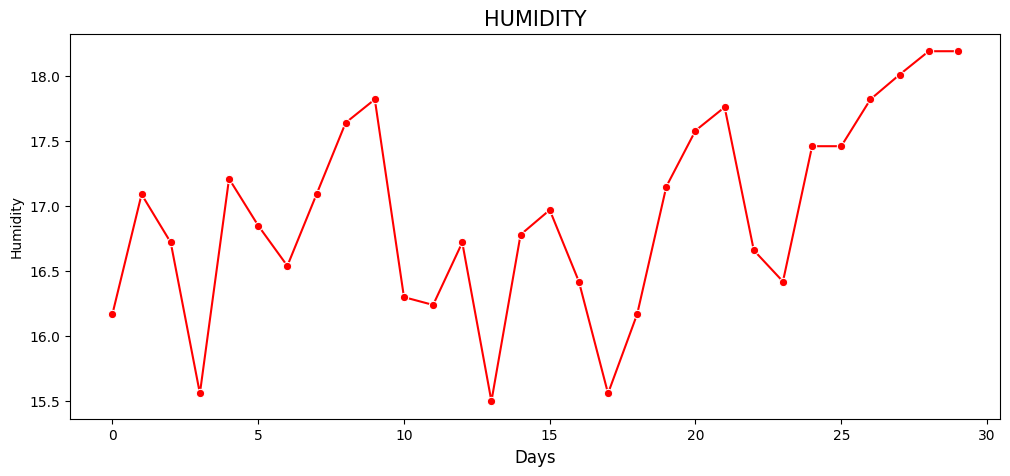

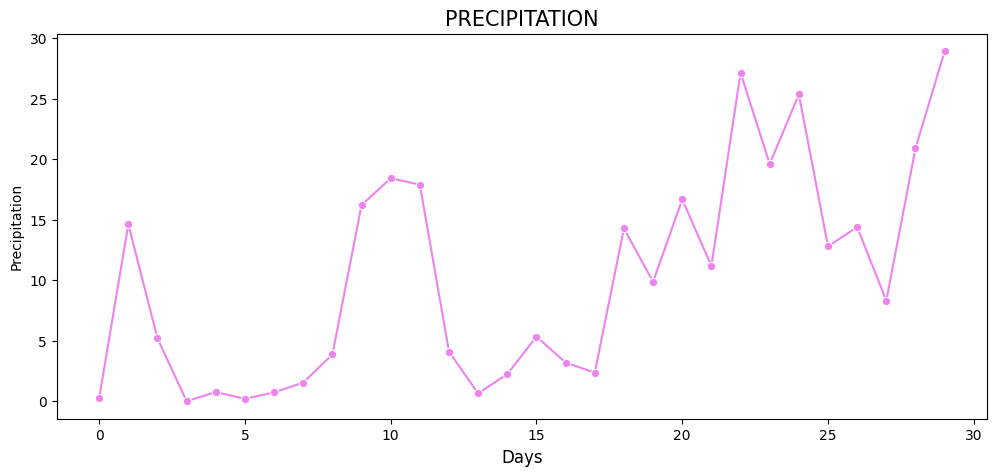

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


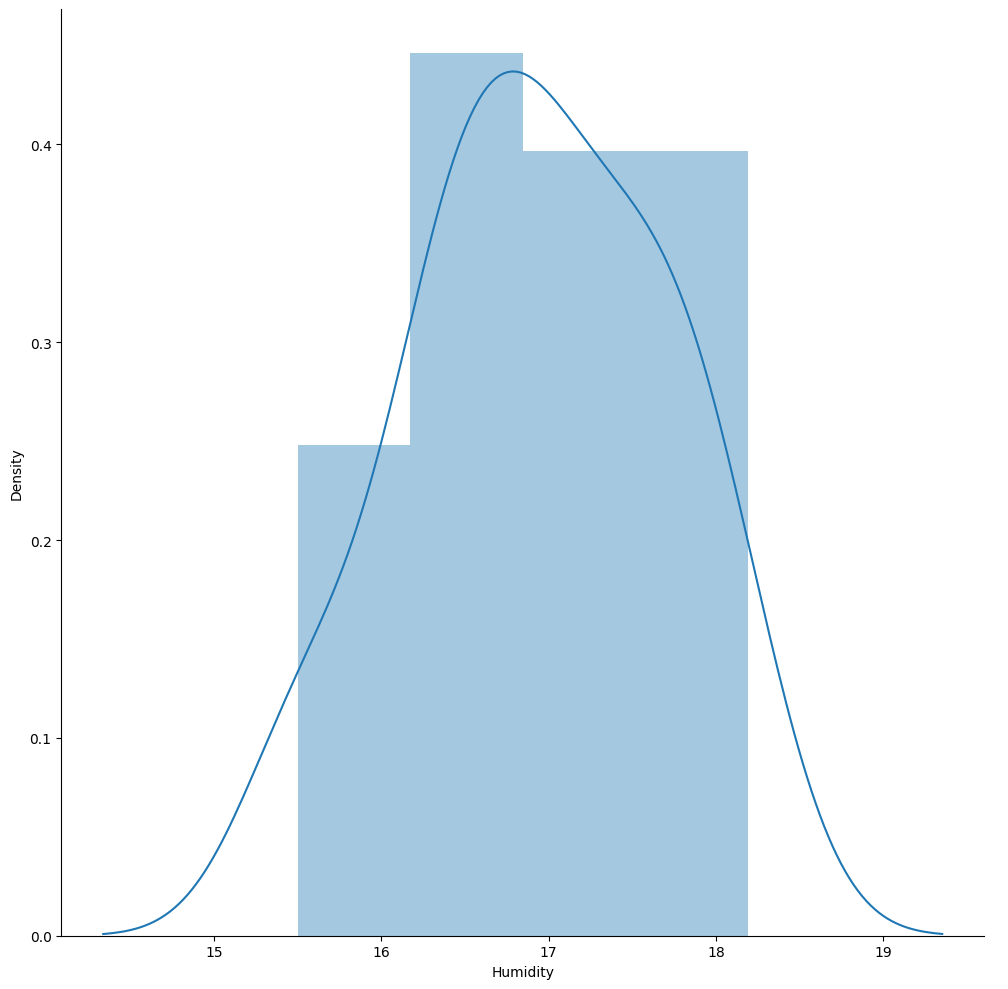

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

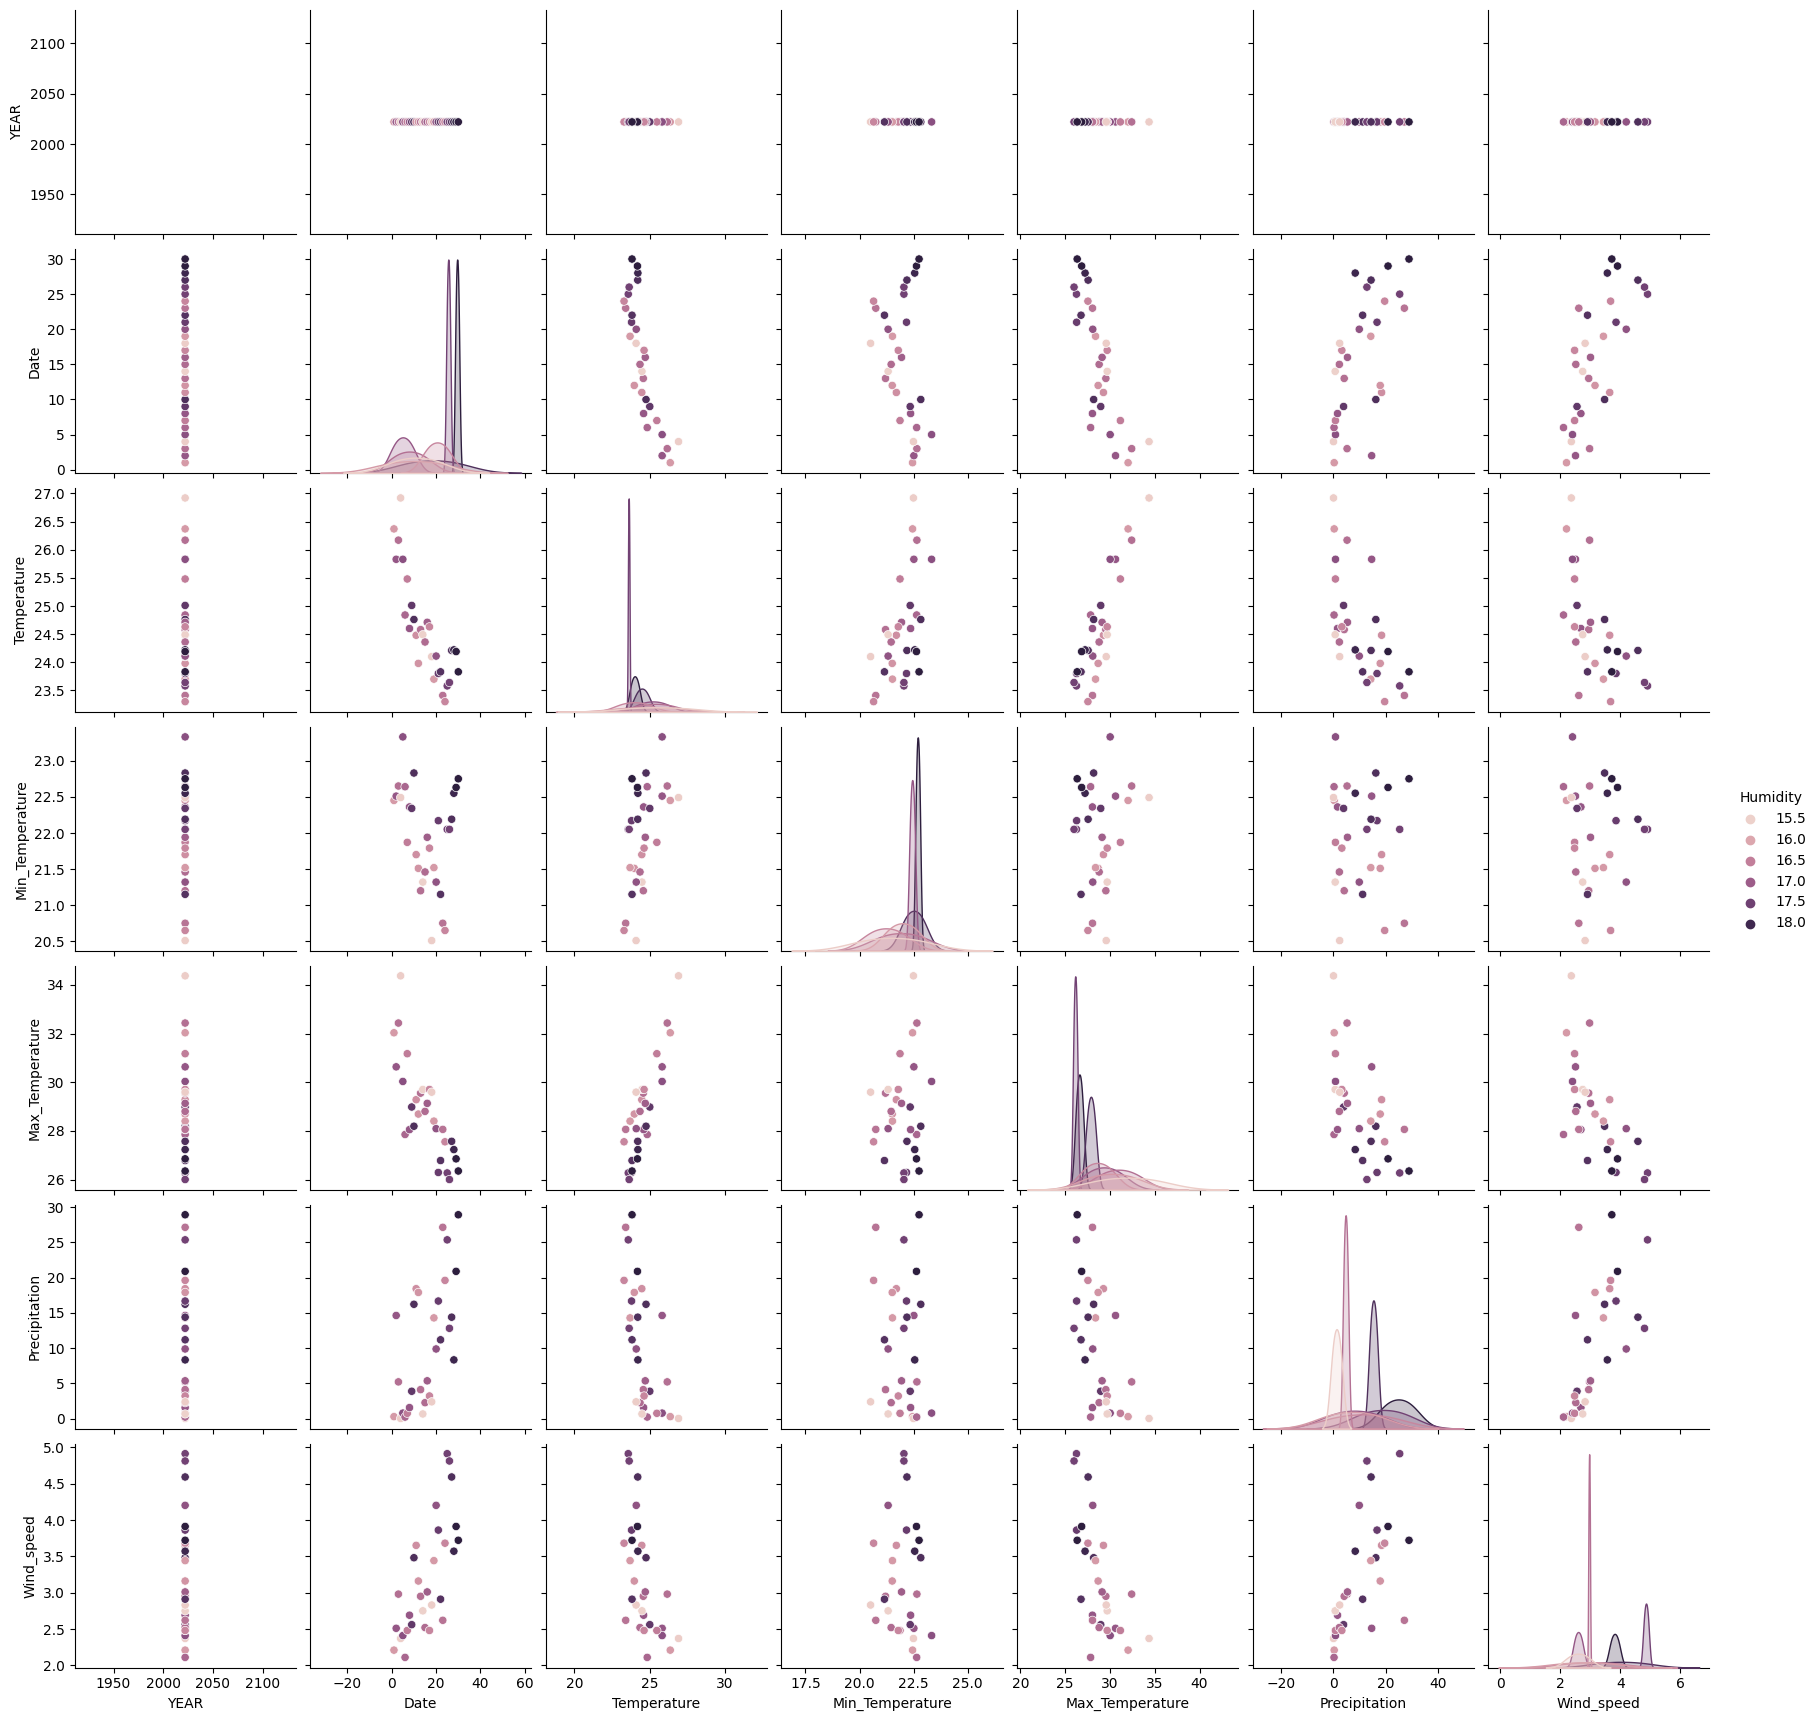

In [ ]:
sns.pairplot(data,hue="Humidity")

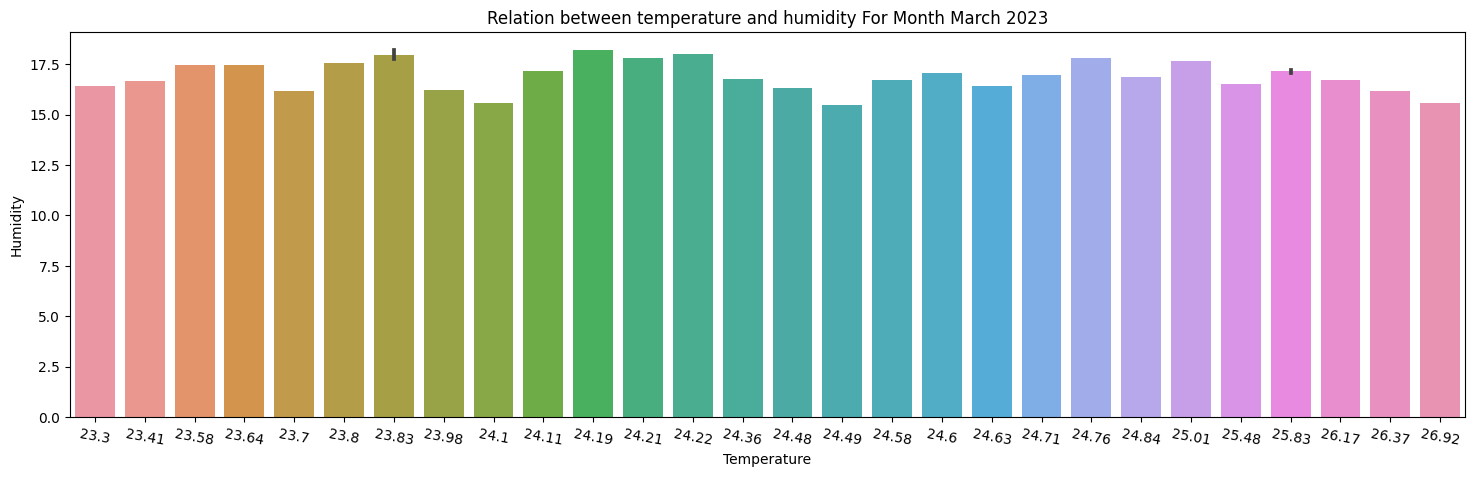

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

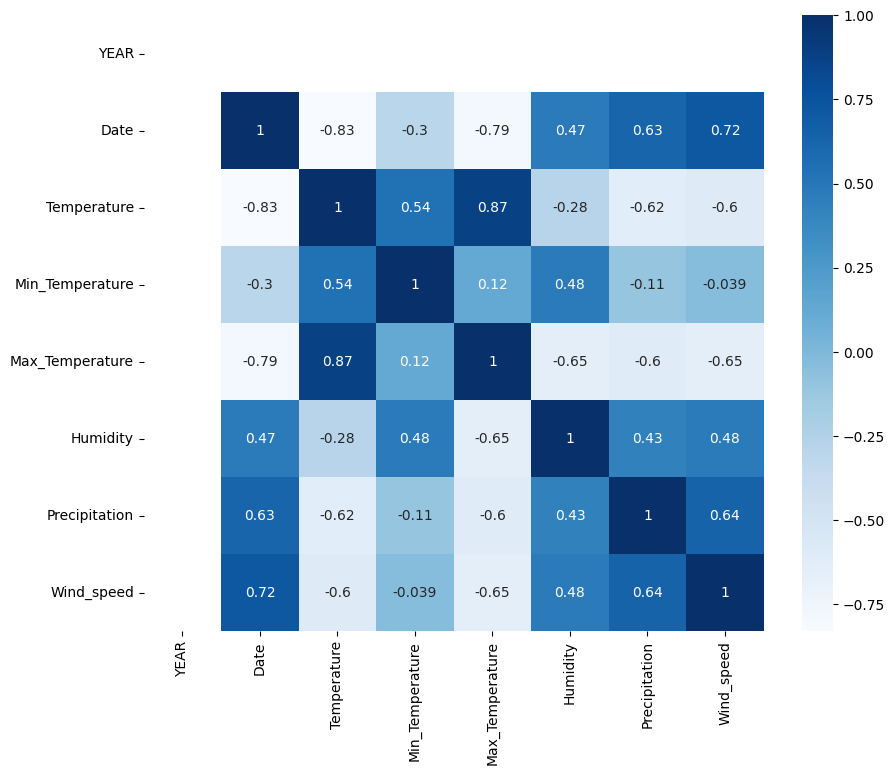

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

**Humidity** (Create a pivot table to aggregate humidity by date & Heatmap Using Seaborn)

<Axes: ylabel='Date'>

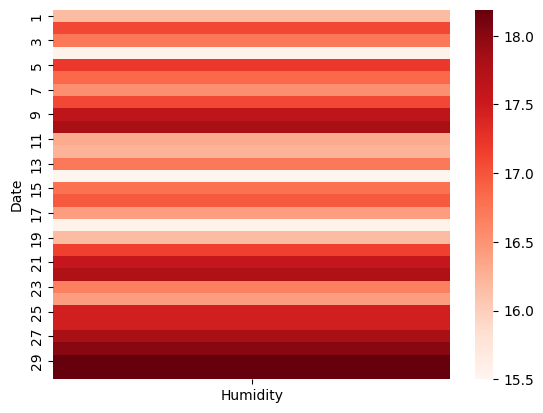

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

Temperature

<Axes: ylabel='Date'>

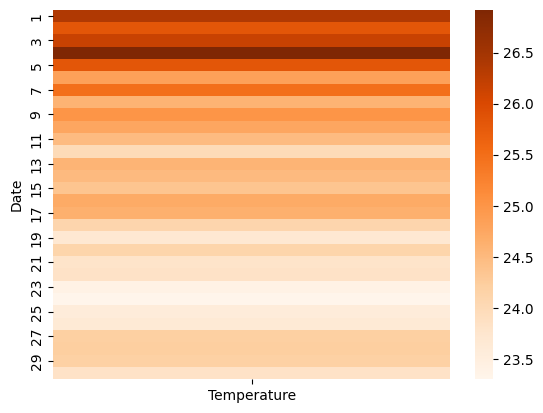

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_speed
0,26.37,16.17,0.27,2.21
1,25.83,17.09,14.62,2.51
2,26.17,16.72,5.20,2.98
3,26.92,15.56,0.01,2.37
4,25.83,17.21,0.77,2.41
5,24.84,16.85,0.21,2.11
6,25.48,16.54,0.74,2.48
7,24.60,17.09,1.55,2.69
8,25.01,17.64,3.87,2.56
9,24.76,17.82,16.21,3.48


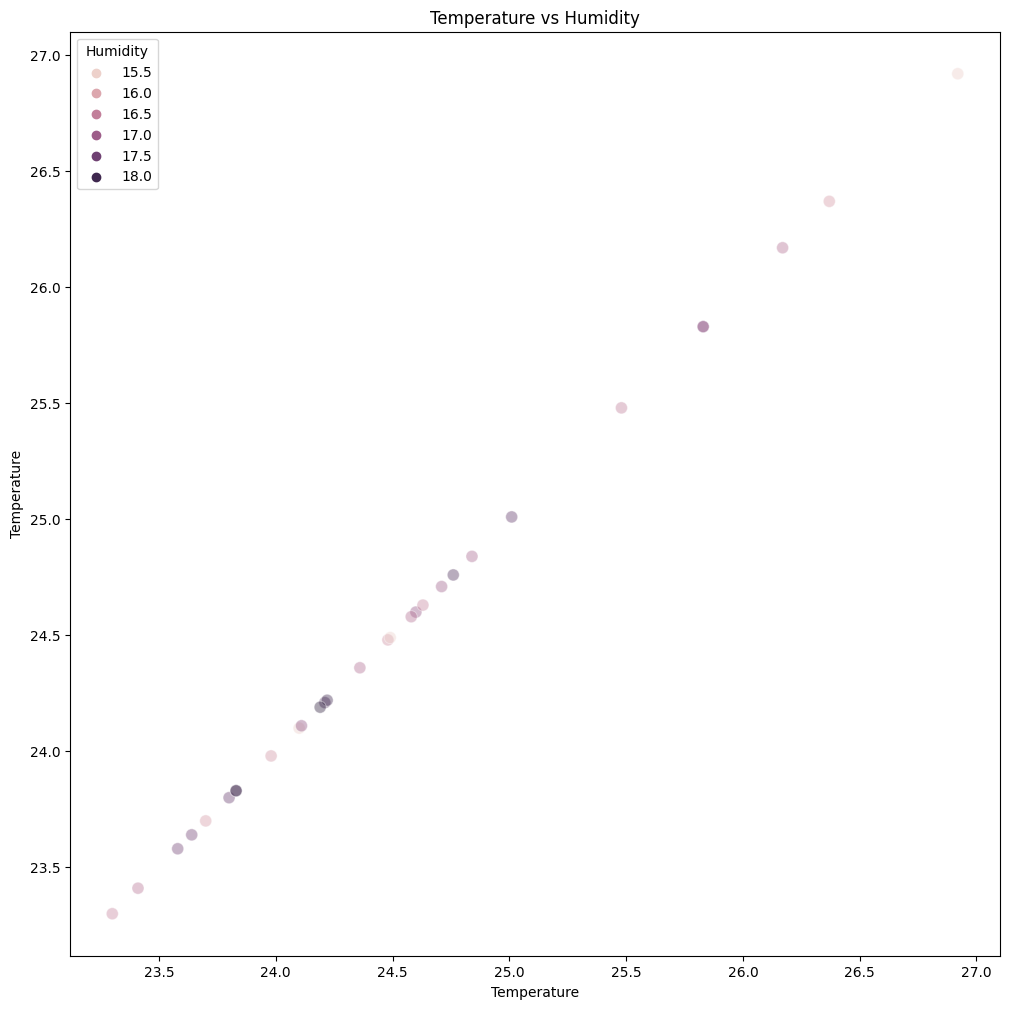

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

DAYS-WISE ANALYSIS

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

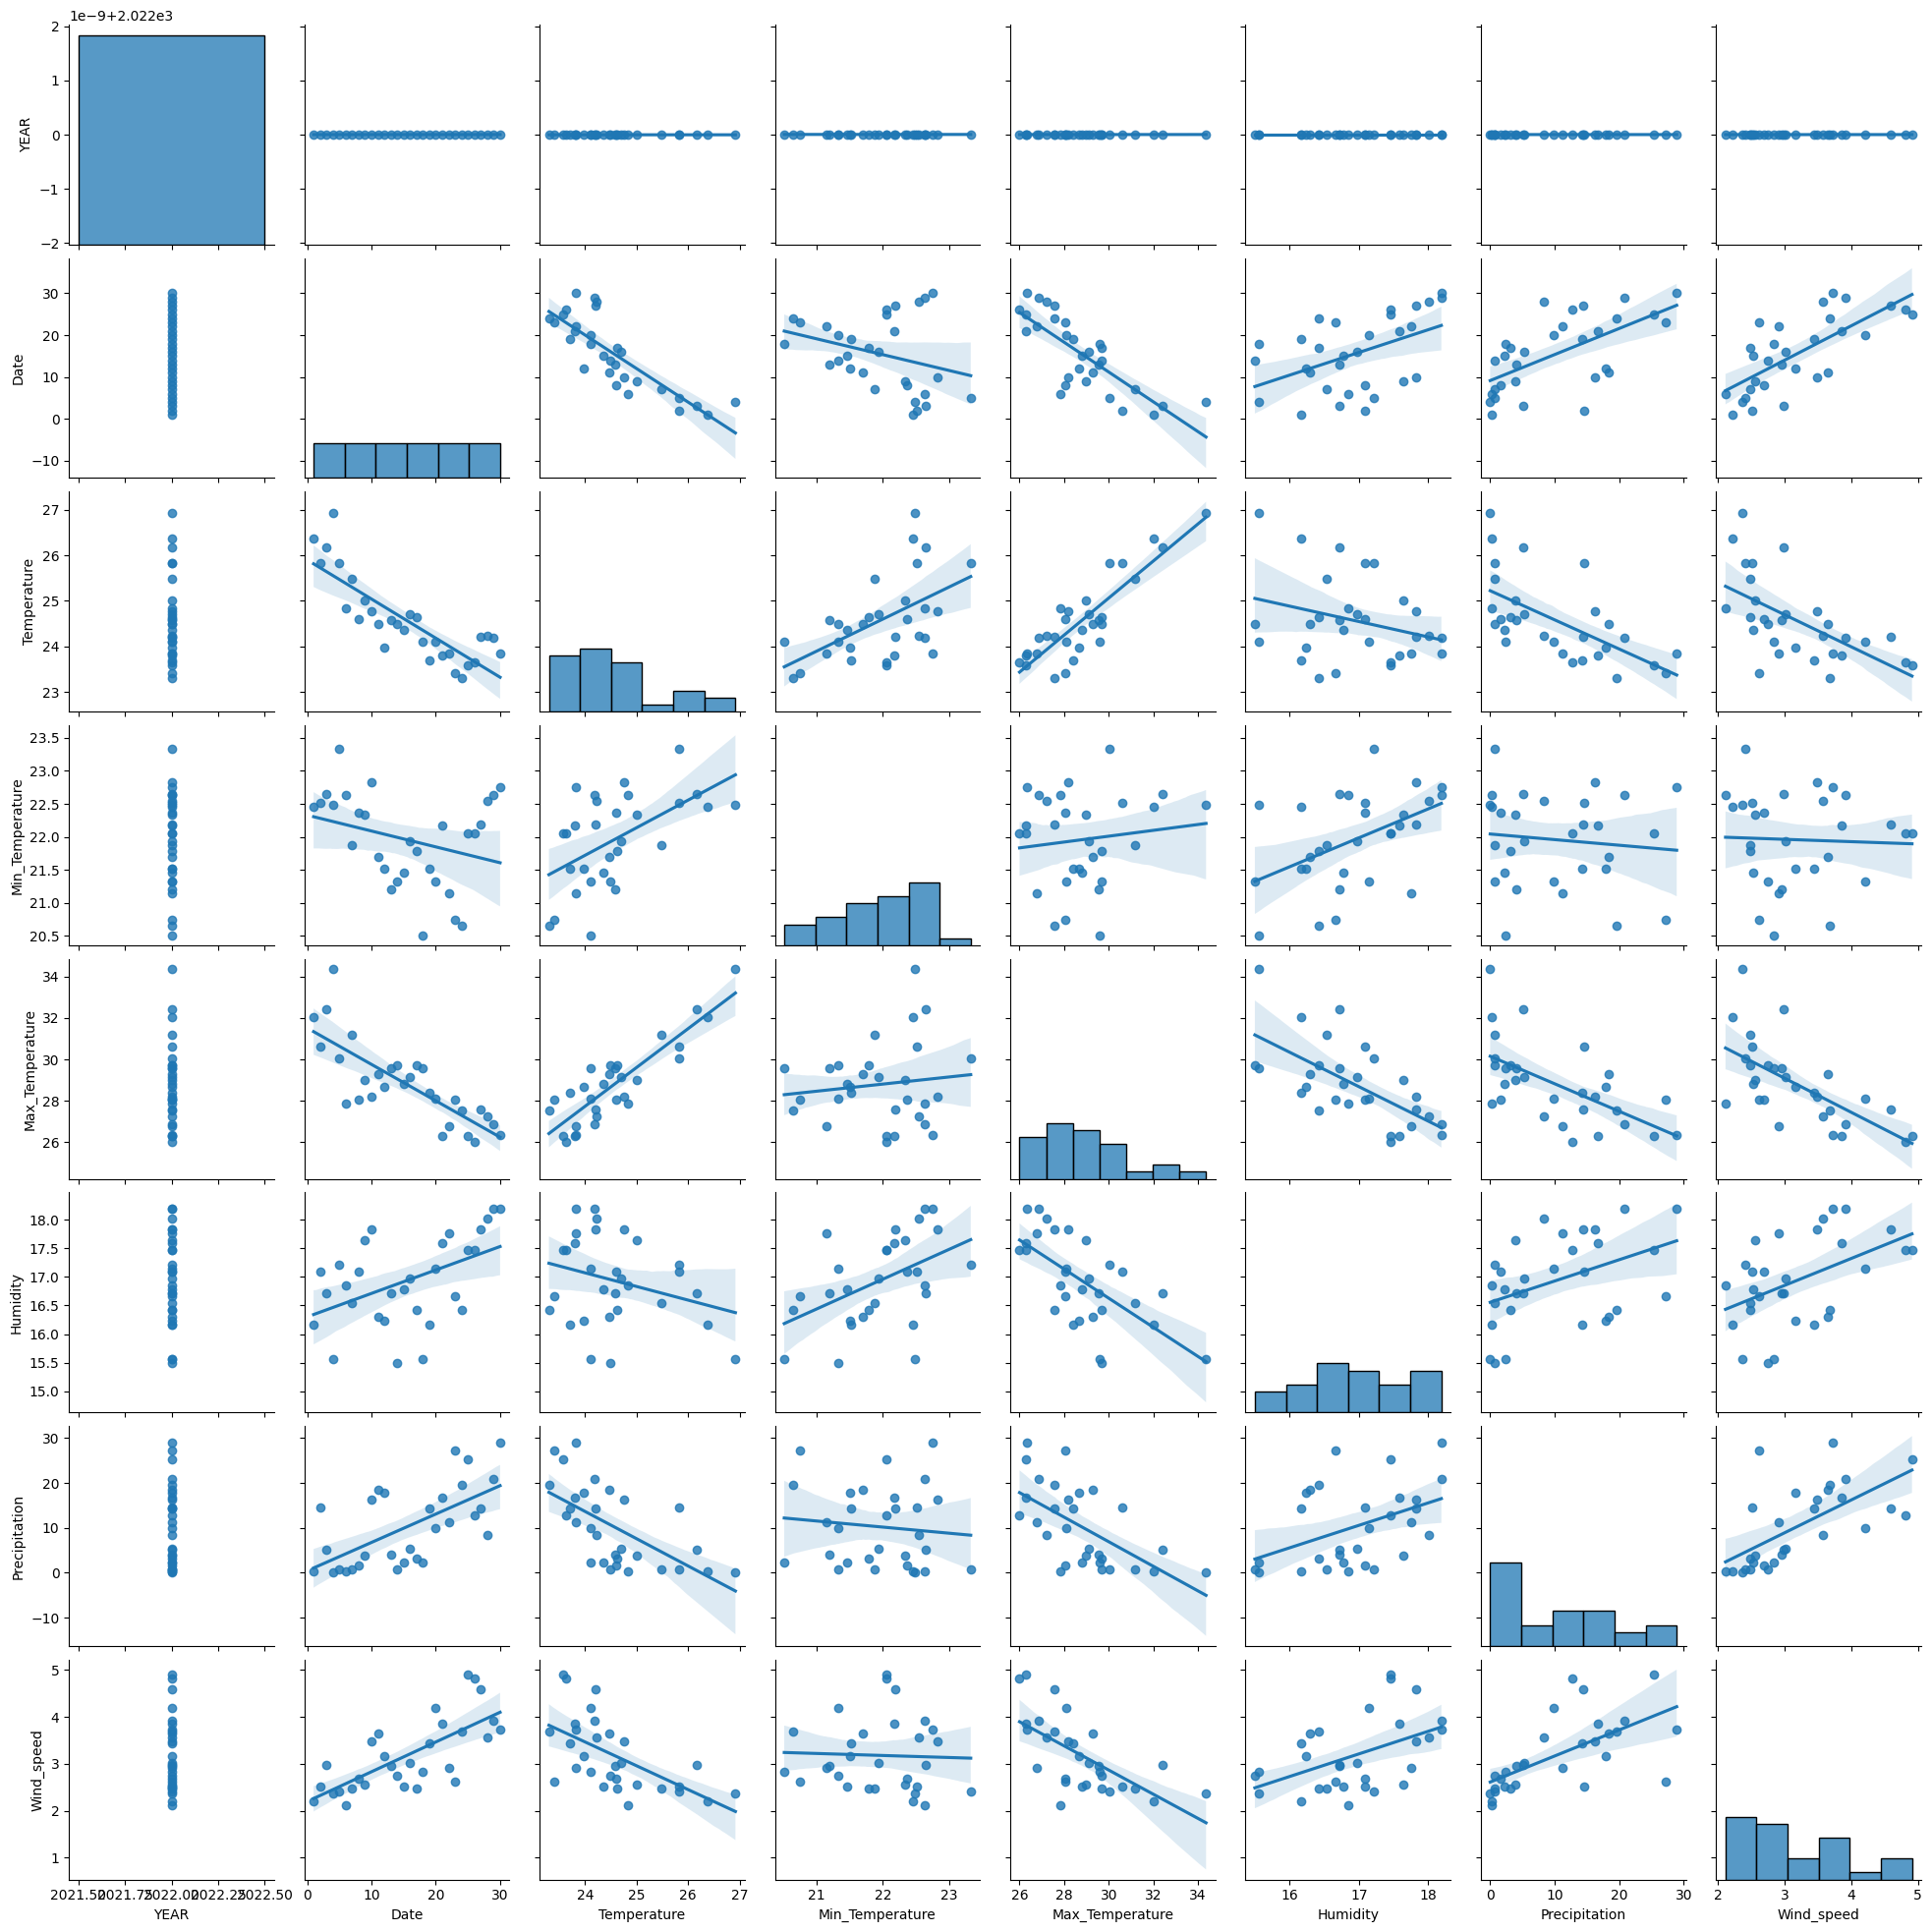

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

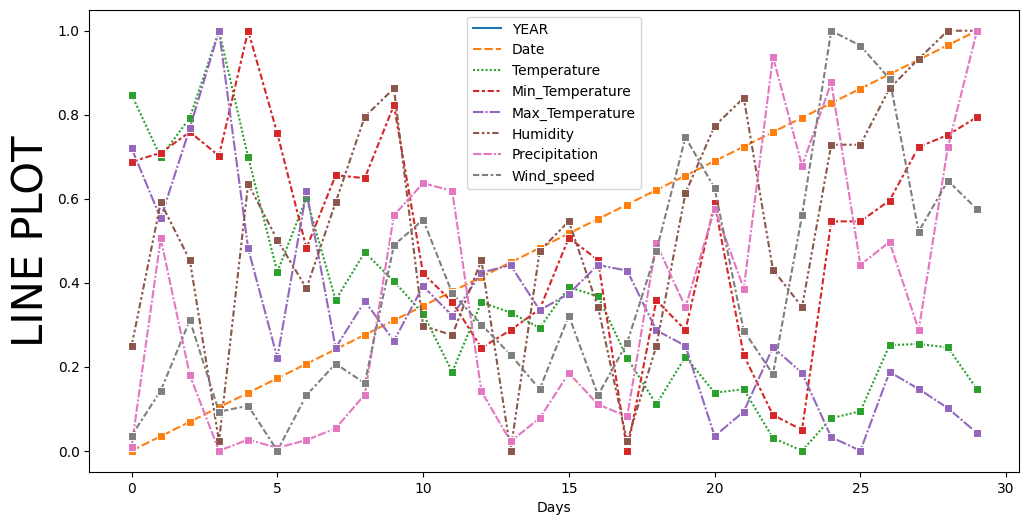

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

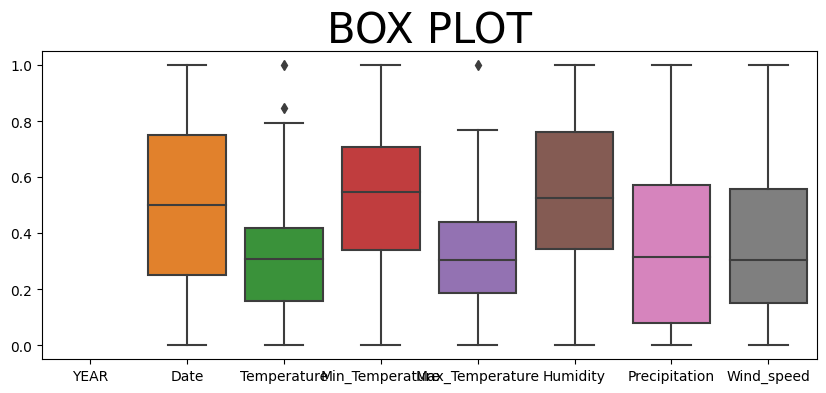

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

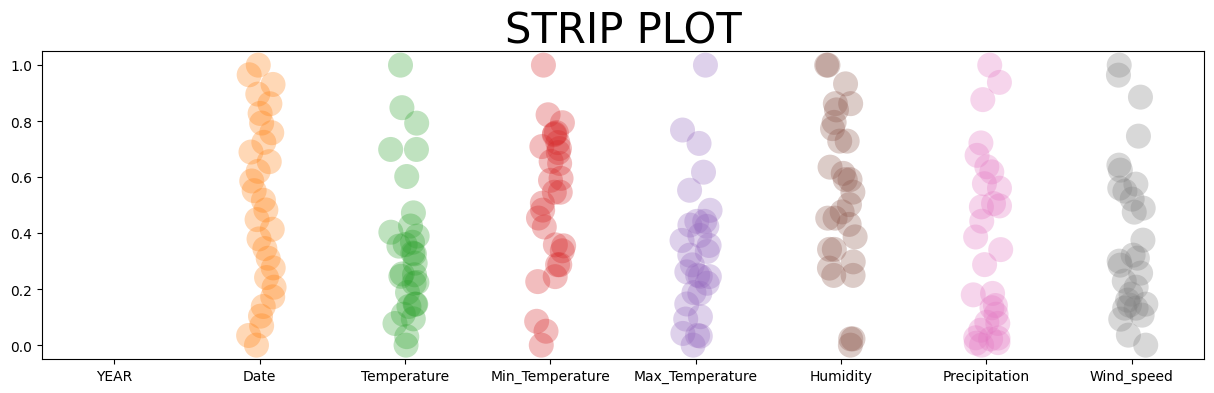

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()